# 5. Linear Regression
Linear regression is a technique used to model the relationship between two or more variables. In particular, linear regression is used when one of the variables is thought to be dependent on a set of independent variables.

---

Set local environment

In [1]:
import numpy as np
import pandas as pd
from statsmodels.api import OLS
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Consider the following data of 506 houses listed on the 1978 Boston real estate market. The dependent variable, `MEDV`, is the price in thousands of dollars, which is thought to be dependent on the columns to its left (AKA the independent variables).

In [2]:
df = pd.read_csv(load_boston()['filename'], header=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Our dependent variable, `MEDV` seems to have a negative relationship with `LSTAT`, which denotes the percentage of "low-status" households in the area. 

We can think of the relationship as a causal one. That is, the percentage of low-status households in the area determines a house's price. The higher the percentage of low-status neighbors, the lower the price will be.

This is most likely not a one-way relationship, but we will use `LSTAT` as the independent variable and `MEDV` as the dependent variable.

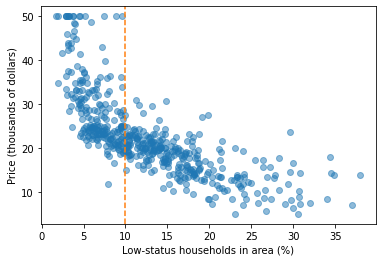

In [3]:
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5)
plt.xlabel('Low-status households in area (%)')
plt.ylabel('Price (thousands of dollars)')
plt.axvline(10, ls='--', color='C1')
plt.show()

The orange vertical line shows that, for a fixed percentage of low-status households (10%), the price varies considerably. Hence, a house's price can be regarded as a random variable with mean $E(Y|x)$, variance $V(Y|x)$, and so on.

In this notation, $Y$ is a random variable that represents a house's price once $x$ has been fixed. It is important to note that $x$ is not a random variable for the purpose of this model. It should be thought of as a fixed value known exactly to the experimenter. We will see the implications of variablity in the independent variables later on.

The characteristics of the distribution of $Y$ given $x$, and in particular of $E(Y|x)$, change with $x$. The line of $E(Y|x)$ is called the regression of $Y$ on $x$.

The simplest and most important kind of regression is a straight line:

$E(Y|x) = \alpha + \beta x$

Where $\alpha$ is the intercept and $\beta$ is the slope of the line that goes through the expected value of $Y$ for all given values of $x$. Our job is to estimate these two parameters. We typically do this by defining a loss function, which we minimize in order to obtain the line of best fit according to the arbitrary criteria that we choose.

The most common loss function is the sum of squared deviations of observed from estimated values of $y$. Minimizing the cost function will yield the line

$\hat{y} = a + bx$

It is extremely important to understand that $a$ and $b$ are estimates of $\alpha$ and $\beta$ respectively. Minimizing the sum of squared deviations is known as the method of Ordinary Least Squares.

Suppose we have $n$ pairs of observations $(x_1, y_1)$, $(x_2, y_2)$, etc. The estimators are derived as follows:

$\text{min}_{\{a,b\}} [\space S^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2]$

Which given our linear model is equivalent to:

$\text{min}_{\{a,b\}} \sum_{i=1}^n (y_i - a - bx_i)^2$

Setting the first order conditions to zero:

1. $\frac{\delta S^2}{\delta a} = -2 \sum_{i=1}^{n} (y_i - a - bx_i) = 0$

2. $\frac{\delta S^2}{\delta b} = -2 \sum_{i=1}^{n} x_i(y_i - a - bx_i) = 0$

From the first partial derivative:

$\sum_{i=1}^{n} (y_i - a - bx_i) = \sum_{i=1}^{n} y_i - na - b\sum_{i=1}^{n}x_i$

Solving for $a$:

$a = \frac{\sum_{i=1}^{n} y_i - b\sum_{i=1}^{n}x_i}{n} = \bar{y} - b\bar{x}$

This equation can be expressed as $\bar{y} = a + b\bar{x}$, which tells us that the regression line will go through the points $(\bar{x}, \bar{y})$. If we substitute $a$ into the second partial derivative:

$\sum_{i=1}^{n} x_i(y_i - \bar{y} + b \bar{x} - bx_i) =
\sum_{i=1}^{n} x_i(y_i - \bar{y}) - b \sum_{i=1}^{n} x_i(x_i - \bar{x})$

Solving for $b$:

$b = \frac{\sum_{i=1}^{n} x_i(y_i - \bar{y})}{\sum_{i=1}^{n} x_i(x_i - \bar{x})}$

We have thus found the estimators that minimize the loss function. However, $b$ can be expressed in a more elegant way. In order to do it, note that: